In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import re
import seaborn as sns

In [2]:
# import from csv fine and see the head
mov_train=pd.read_csv("./DataSets/mov_train.csv")
mov_train.head()
actors=pd.read_csv("./DataSets/actors.csv")
actors['name'] = actors['Unnamed: 0']
actors.head()
good_actors = actors[actors.Score>0.45]
good_actors.head()

,Unnamed: 0,MoviesN,AvgPop,AvgIMDB,Score,name
0,Stan Lee,8,0.257924,0.762346,0.606930,Stan Lee
1,Gino Corrado,6,0.027834,0.849794,0.574599,Gino Corrado
2,Joseph Oliveira,5,0.163211,0.861728,0.574432,Joseph Oliveira
3,Andy Serkis,10,0.117575,0.766667,0.571418,Andy Serkis
4,Philip Ettington,15,0.053379,0.772840,0.556998,Philip Ettington


In [3]:
# drop unnecessary columns
mov_train.drop(columns = ['id', 'Unnamed: 0','belongs_to_collection','homepage','overview','poster_path','tagline'],inplace=True)

In [4]:
# check if any movie is not released
mov_train[mov_train['status']!='Released']

,budget,genres,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,Keywords,cast,crew,revenue,imdb_rating,numVotes
609,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 16, 'na...",tt0120254,en,The Swan Princess: Escape from Castle Mountain,5.121309,NaN,NaN,1/1/97,71.0,"[{'iso_639_1': 'da', 'name': 'Dansk'}, {'iso_6...",Rumored,The Swan Princess: Escape from Castle Mountain,"[{'id': 3071, 'name': 'prince'}, {'id': 4456, ...","[{'cast_id': 2, 'character': 'Odette (voice)',...","[{'credit_id': '52fe488bc3a36847f816cfd3', 'de...",273644,5.6,3744.0
1007,0,"[{'id': 35, 'name': 'Comedy'}]",tt1860180,en,Billy Gardell: Halftime,0.007877,NaN,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/5/11,60.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Rumored,Billy Gardell: Halftime,NaN,"[{'cast_id': 9, 'character': 'Himself', 'credi...","[{'credit_id': '52fe4be1c3a368484e19d265', 'de...",60,7.6,111.0
1216,0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",tt0091024,en,Extremities,10.273979,"[{'name': 'Atlantic Entertainment Group', 'id'...","[{'iso_3166_1': 'US', 'name': 'United States o...",8/22/86,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Rumored,Extremities,"[{'id': 2483, 'name': 'nudity'}, {'id': 2539, ...","[{'cast_id': 1, 'character': 'Marjorie', 'cred...","[{'credit_id': '582cca1c925141780b00259f', 'de...",13418091,6.3,3982.0
1618,891000,"[{'id': 99, 'name': 'Documentary'}]",tt0145394,en,A Place Called Chiapas,0.179246,NaN,"[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2/20/98,89.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Rumored,A Place Called Chiapas,"[{'id': 187056, 'name': 'woman director'}]","[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '57b4f7619251417287000dfc', 'de...",229000,7.4,392.0


In [6]:
# extract all the genres
genres=set()
for item in mov_train.genres:
    print(type(item) == str)
    if isinstance(item,str):
        x=re.finditer("(\'name\':\s\')(?P<name>\w*)(?=\')",item)
        for s in x:
            genres.add(s.groupdict()['name'])
print(genres)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
Tru

In [7]:
# created new colums for month and year and filled it in by extracting them from the release date
mov_train['month']=0
mov_train['year']=0
for j in mov_train.index:
    string=mov_train['release_date'].iloc[j]
    x=re.findall("([\d]{1,2})/([\d]{1,2})/([\d]{1,2})",string)
    mov_train.loc[j,"month"] = int(x[0][0])
    year = int(x[0][2])
    if year<23:
        mov_train.loc[j,"year"] = 2000 + year
    else:
        mov_train.loc[j,"year"] = 1900+ year

In [59]:
print(mov_train['year'].min())
print(mov_train['year'].max())

1924
2021


In [9]:
# we want to adjust the revenue and budget to account for inflation
inflation=pd.read_csv(".\DataSets\inflation_data.csv")

In [10]:
inflation.loc[0,'amount']

1.0

In [11]:
revenue_zero = mov_train[mov_train['revenue']==0]
print(revenue_zero)

Empty DataFrame
Columns: [budget, genres, imdb_id, original_language, original_title, popularity, production_companies, production_countries, release_date, runtime, spoken_languages, status, title, Keywords, cast, crew, revenue, imdb_rating, numVotes, month, year]
Index: []

[0 rows x 21 columns]


In [12]:
mov_train['infl_budget']=0
mov_train['infl_revenue']=0

In [13]:
for j in mov_train.index:
    x = mov_train.loc[j,"year"]
    y = inflation.loc[x-1900,'amount']
    mov_train.loc[j,'infl_budget'] = mov_train.loc[j,'budget']*35.48/y
    mov_train.loc[j,'infl_revenue'] = mov_train.loc[j,'revenue']*35.48/y
    
mov_train.head()

,budget,genres,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,...,Keywords,cast,crew,revenue,imdb_rating,numVotes,month,year,infl_budget,infl_revenue
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,...,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,5.0,39572.0,2,2015,1.760170e+07,1.548277e+07
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,...,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,5.8,82272.0,8,2004,6.310360e+07,1.501068e+08
2,3300000,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,Whiplash,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,...,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,8.5,852772.0,10,2014,4.154862e+06,1.648347e+07
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",tt1821480,hi,Kahaani,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,...,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,8.1,63220.0,3,2012,1.557849e+06,2.077131e+07
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt1380152,ko,마린보이,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,...,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,5.7,316.0,2,2009,0.000000e+00,5.451153e+06


In [14]:
# for films which have budget = 0, we will replace it with the average of budget of all films released within 3 years of that movie, and sharing a genre
mov_train['mod_budget'] = mov_train['infl_budget']
budget_zero = mov_train[mov_train['budget']==0]
for j in budget_zero.index:
    x = budget_zero.loc[j,'year']
    this_genres=set()
    item = budget_zero.loc[j,'genres']
    if(type(item)==str):
        y=re.finditer("(\'name\':\s\')(?P<name>\w*)(?=\')",item)
        for s in y:
            this_genres.add(s.groupdict()['name'])
    total = 0
    total_2 = 0
    count = 0
    count_2 = 0
    for k in mov_train.index:
        if k not in budget_zero.index:
            if abs(mov_train.loc[k,'year'] - x)<= 3:
                total_2 = total_2 + mov_train.loc[k,'infl_budget']
                count_2 = count_2 + 1
                that_genres=set()
                item = mov_train.loc[k,'genres']
                if(type(item)==str):
                    y=re.finditer("(\'name\':\s\')(?P<name>\w*)(?=\')",item)
                    for s in y:
                        that_genres.add(s.groupdict()['name'])
                    if len(this_genres.intersection(that_genres))!= 0:
                        total = total + mov_train.loc[k,'infl_budget']
                        count = count + 1
    if count == 0:
        average = total_2/count_2
    else:
        average = total/count
    mov_train.loc[j,'mod_budget'] = average

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A77476C910>,
      dtype=object)

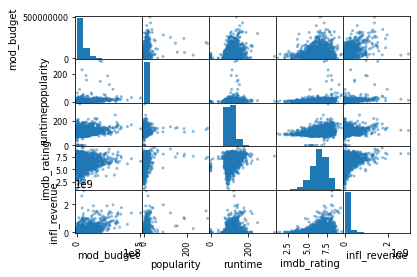

In [15]:
pd.plotting.scatter_matrix(mov_train[['mod_budget','popularity','runtime','imdb_rating','infl_revenue']])

In [16]:
corr_matrix1 = mov_train[['mod_budget','popularity','runtime','imdb_rating','infl_revenue']].corr()
print(corr_matrix1)

              mod_budget  popularity   runtime  imdb_rating  infl_revenue
mod_budget      1.000000    0.272392  0.260203     0.004243      0.594614
popularity      0.272392    1.000000  0.133690     0.159394      0.383882
runtime         0.260203    0.133690  1.000000     0.346248      0.254896
imdb_rating     0.004243    0.159394  0.346248     1.000000      0.206060
infl_revenue    0.594614    0.383882  0.254896     0.206060      1.000000


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
mov_train_standard=mov_train.copy()
scaler=StandardScaler()
scaler.fit(mov_train_standard[['mod_budget','popularity','runtime','imdb_rating','infl_revenue']])
mov_train_standard[['mod_budget','popularity','runtime','imdb_rating','infl_revenue']]=scaler.transform(mov_train_standard[['mod_budget','popularity','runtime','imdb_rating','infl_revenue']])

In [18]:
corr_matrix2 = mov_train_standard[['mod_budget','popularity','runtime','imdb_rating','infl_revenue']].corr()
print(corr_matrix2)

              mod_budget  popularity   runtime  imdb_rating  infl_revenue
mod_budget      1.000000    0.272392  0.260203     0.004243      0.594614
popularity      0.272392    1.000000  0.133690     0.159394      0.383882
runtime         0.260203    0.133690  1.000000     0.346248      0.254896
imdb_rating     0.004243    0.159394  0.346248     1.000000      0.206060
infl_revenue    0.594614    0.383882  0.254896     0.206060      1.000000


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
mov_train_minmax=mov_train.copy()
scaler2=MinMaxScaler()
scaler2.fit(mov_train_minmax[['mod_budget','popularity','runtime','imdb_rating','infl_revenue']])
mov_train_minmax[['mod_budget','popularity','runtime','imdb_rating','infl_revenue']]=scaler2.transform(mov_train_minmax[['mod_budget','popularity','runtime','imdb_rating','infl_revenue']])

In [20]:
corr_matrix3 = mov_train_minmax[['mod_budget','popularity','runtime','imdb_rating','infl_revenue']].corr()
print(corr_matrix3)

              mod_budget  popularity   runtime  imdb_rating  infl_revenue
mod_budget      1.000000    0.272392  0.260203     0.004243      0.594614
popularity      0.272392    1.000000  0.133690     0.159394      0.383882
runtime         0.260203    0.133690  1.000000     0.346248      0.254896
imdb_rating     0.004243    0.159394  0.346248     1.000000      0.206060
infl_revenue    0.594614    0.383882  0.254896     0.206060      1.000000


In [21]:
mov_train['log_mod_budget']=np.log(mov_train['mod_budget'])
mov_train['log_infl_revenue']=np.log(mov_train['infl_revenue'])

In [22]:
corr_matrix4 = mov_train[['log_mod_budget','popularity','runtime','imdb_rating','log_infl_revenue']].corr()
print(corr_matrix4)

                  log_mod_budget  popularity   runtime  imdb_rating  \
log_mod_budget          1.000000    0.165197  0.133150    -0.045222   
popularity              0.165197    1.000000  0.133690     0.159394   
runtime                 0.133150    0.133690  1.000000     0.346248   
imdb_rating            -0.045222    0.159394  0.346248     1.000000   
log_infl_revenue        0.424107    0.270317  0.218957     0.137368   

                  log_infl_revenue  
log_mod_budget            0.424107  
popularity                0.270317  
runtime                   0.218957  
imdb_rating               0.137368  
log_infl_revenue          1.000000  


In [23]:
mov_train['num_good_actors']=0
for j in mov_train.index:
    set_actors=set()
    item = mov_train.loc[j,'cast']
    if(type(item)==str):
        x=re.finditer("(\'name\':\s\')(?P<name>[\w\.\s]*)(?=\')",item)
        for s in x:
            set_actors.add(s.groupdict()['name'])
    for actor in set_actors:
        if actor in good_actors['name'].values:
            mov_train.loc[j,'num_good_actors'] = mov_train.loc[j,'num_good_actors'] + 1

In [93]:
mov_train['actor_score']=0

In [180]:
mov_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                3000 non-null   int64  
 1   genres                2993 non-null   object 
 2   imdb_id               3000 non-null   object 
 3   original_language     3000 non-null   object 
 4   original_title        3000 non-null   object 
 5   popularity            3000 non-null   float64
 6   production_companies  2844 non-null   object 
 7   production_countries  2945 non-null   object 
 8   release_date          3000 non-null   object 
 9   runtime               3000 non-null   float64
 10  spoken_languages      2980 non-null   object 
 11  status                3000 non-null   object 
 12  title                 3000 non-null   object 
 13  Keywords              2724 non-null   object 
 14  cast                  2987 non-null   object 
 15  crew                 

In [102]:
for j in mov_train.index:
    set_actors=set()
    item = mov_train.loc[j,'cast']
    if(type(item)==str):
        x=re.finditer("(\'name\':\s\')(?P<name>[\w\.\s]*)(?=\')",item)
        for s in x:
            set_actors.add(s.groupdict()['name'])
    for actor in set_actors:
        if actor in actors['name'].values:
            mov_train.loc[j,'actor_score'] = mov_train.loc[j,'actor_score'] + actors[actors.name ==actor].Score.iloc[0]
mov_train.head()

,budget,genres,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,...,Romance,Comedy,Animation,War,Fantasy,Mystery,Music,phony,pred_revenue,actor_score
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,...,0,1,0,0,0,0,0,1,-1.822551e+07,5.526758
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,...,1,1,0,0,0,0,0,1,1.118410e+08,5.274723
2,3300000,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,Whiplash,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,...,0,0,0,0,0,0,0,1,2.742990e+08,9.527253
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",tt1821480,hi,Kahaani,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,...,0,0,0,0,0,0,0,1,1.866195e+07,0.826697
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt1380152,ko,마린보이,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,...,0,0,0,0,0,0,0,1,9.170764e+07,0.000000


In [106]:
print(mov_train[mov_train.actor_score == 0])

         budget                                             genres    imdb_id  \
4             0  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...  tt1380152   
233           0  [{'id': 37, 'name': 'Western'}, {'id': 99, 'na...  tt1517252   
518   149000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...  tt0451279   
611     8575000  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...  tt4016934   
680   125000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...  tt0319262   
773           0                [{'id': 99, 'name': 'Documentary'}]  tt0264802   
906   250000000  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...  tt1345836   
910           0                      [{'id': 18, 'name': 'Drama'}]  tt2942522   
934    40000000  [{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...  tt4425200   
1136          0  [{'id': 16, 'name': 'Animation'}, {'id': 10751...  tt1468843   
1141          0  [{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n...  tt1922561   
1157    3500000  [{'id': 18,

In [24]:
corr_matrix5 = mov_train[['infl_revenue','log_infl_revenue','num_good_actors']].corr()
print(corr_matrix5)

                  infl_revenue  log_infl_revenue  num_good_actors
infl_revenue          1.000000          0.513754         0.384511
log_infl_revenue      0.513754          1.000000         0.354544
num_good_actors       0.384511          0.354544         1.000000


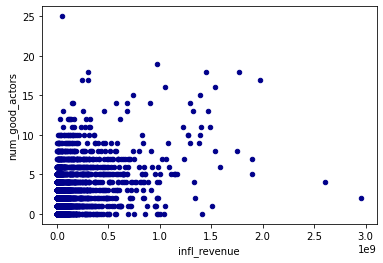

In [25]:
ax1 = mov_train.plot.scatter(x='infl_revenue',y='num_good_actors',c='DarkBlue')

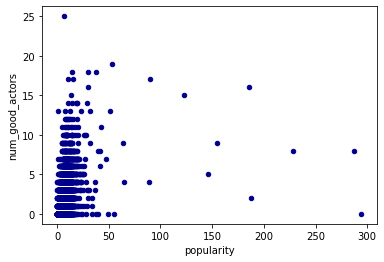

In [26]:
ax1 = mov_train.plot.scatter(x='popularity',y='num_good_actors',c='DarkBlue')

In [27]:
genres=set()
for item in mov_train.genres:
    if(type(item)==str):
        x=re.finditer("(\'name\':\s\')(?P<name>\w*)(?=\')",item)
        for s in x:
            genres.add(s.groupdict()['name'])

In [28]:
for genre in genres:
    mov_train[genre]=0

In [29]:
for genre in genres:
    mov_train[genre]=0
for j in mov_train.index:
    row_genres=set()
    item = mov_train.loc[j,'genres']
    if(type(item)==str):
        x=re.finditer("(\'name\':\s\')(?P<name>\w*)(?=\')",item)
        for s in x:
            row_genres.add(s.groupdict()['name'])
    for genre in row_genres:
        mov_train.loc[j,genre]=mov_train.loc[j,genre]+1
mov_train.head()

,budget,genres,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,...,Foreign,Western,Documentary,Romance,Comedy,Animation,War,Fantasy,Mystery,Music
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,...,0,0,0,0,1,0,0,0,0,0
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,...,0,0,0,1,1,0,0,0,0,0
2,3300000,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,Whiplash,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,...,0,0,0,0,0,0,0,0,0,0
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",tt1821480,hi,Kahaani,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,...,0,0,0,0,0,0,0,0,0,0
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt1380152,ko,마린보이,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
corr_matrix6 = mov_train[['infl_revenue','mod_budget','num_good_actors','actor_score']].corr()
print(corr_matrix6)

                 infl_revenue  mod_budget  num_good_actors  actor_score
infl_revenue         1.000000    0.594614         0.384511     0.434943
mod_budget           0.594614    1.000000         0.415074     0.436680
num_good_actors      0.384511    0.415074         1.000000     0.900978
actor_score          0.434943    0.436680         0.900978     1.000000


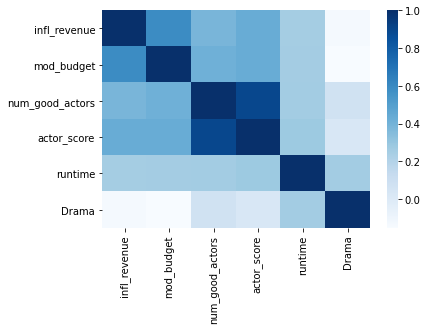

In [174]:
sns.heatmap(mov_train[['infl_revenue','mod_budget','num_good_actors','actor_score','runtime','Drama']].corr(),cmap='Blues')

In [31]:
mov_train['phony']= 1

In [32]:
mov_train['imdb_rating'].fillna(mov_train['imdb_rating'].mean(),inplace = True)

In [33]:
mov_train['runtime'].fillna(mov_train['runtime'].mean(),inplace = True)

In [181]:
mov_train['actor_score'].fillna(mov_train['actor_score'].mean(),inplace = True)

In [34]:
mov_train[mov_train.num_good_actors > 1].head()

,budget,genres,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,...,Western,Documentary,Romance,Comedy,Animation,War,Fantasy,Mystery,Music,phony
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,...,0,0,1,1,0,0,0,0,0,1
2,3300000,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,Whiplash,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,...,0,0,0,0,0,0,0,0,0,1
8,0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",tt0117110,en,Muppet Treasure Island,6.902423,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/16/96,100.0,...,0,0,0,1,0,0,0,0,1,1
9,6000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",tt0310281,en,A Mighty Wind,4.672036,"[{'name': 'Castle Rock Entertainment', 'id': 97}]","[{'iso_3166_1': 'US', 'name': 'United States o...",4/16/03,91.0,...,0,0,0,1,0,0,0,0,1,1
10,1000000,"[{'id': 18, 'name': 'Drama'}]",tt0075148,en,Rocky,14.774066,"[{'name': 'United Artists', 'id': 60}]","[{'iso_3166_1': 'US', 'name': 'United States o...",11/21/76,119.0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
reg=LinearRegression(copy_X=True,fit_intercept=False)

In [182]:
x_train = mov_train[['mod_budget','actor_score','runtime','popularity','imdb_rating','phony']]

In [183]:
y_train = mov_train['infl_revenue']

In [184]:
reg.fit(x_train,y_train)

LinearRegression(fit_intercept=False)

In [40]:
reg.coef_

array([ 2.13514183e+00,  7.90905503e+06,  6.75336620e+05,  3.50739657e+06,
        3.88669937e+07, -3.43920483e+08,  1.85343995e+07, -4.90932747e+07,
       -1.59028135e+07,  4.87398861e+07,  3.28425734e+07,  2.36277916e+07])

In [41]:
mov_test=pd.read_csv("./DataSets/mov_test.csv")
mov_test.head()   

,Unnamed: 0,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,imdb_rating,numVotes
0,0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,...,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de...",6.3,3581.0
1,1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,...,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de...",5.0,5683.0
2,2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,...,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de...",6.1,24943.0
3,3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,...,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de...",8.3,178038.0
4,4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",...,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de...",6.7,6855.0


In [42]:
mov_test['month']=0
mov_test['year']=0

In [43]:
mov_test.dropna(subset=['release_date'],inplace=True)
mov_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4397 entries, 0 to 4397
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             4397 non-null   int64  
 1   id                     4397 non-null   int64  
 2   belongs_to_collection  877 non-null    object 
 3   budget                 4397 non-null   int64  
 4   genres                 4381 non-null   object 
 5   homepage               1420 non-null   object 
 6   imdb_id                4397 non-null   object 
 7   original_language      4397 non-null   object 
 8   original_title         4397 non-null   object 
 9   overview               4383 non-null   object 
 10  popularity             4397 non-null   float64
 11  poster_path            4397 non-null   object 
 12  production_companies   4140 non-null   object 
 13  production_countries   4296 non-null   object 
 14  release_date           4397 non-null   object 
 15  runt

In [44]:
mov_test.loc[4397,"release_date"]

'9/20/62'

In [45]:
for j in mov_test.index:
    string=mov_test.loc[j,'release_date']
    x=re.findall("([\d]{1,2})/([\d]{1,2})/([\d]{1,2})",string)
    mov_test.loc[j,"month"] = int(x[0][0])
    year = int(x[0][2])
    if year<23:
        mov_test.loc[j,"year"] = 2000 + year
    else:
        mov_test.loc[j,"year"] = 1900+ year

In [60]:
print(mov_test['year'].min())
print(mov_test['year'].max())

1923
2022


In [47]:
mov_test['infl_budget']=0
mov_test['infl_revenue']=0

In [48]:
for j in mov_test.index:
    x = mov_test.loc[j,"year"]
    y = inflation.loc[x-1900,'amount']
    mov_test.loc[j,'infl_budget'] = mov_test.loc[j,'budget']*35.48/y
    
mov_test.head()

,Unnamed: 0,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,...,title,Keywords,cast,crew,imdb_rating,numVotes,month,year,infl_budget,infl_revenue
0,0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de...",6.3,3581.0,7,2007,0.000000e+00,0
1,1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de...",5.0,5683.0,5,1958,9.076279e+05,0
2,2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,...,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de...",6.1,24943.0,5,1997,0.000000e+00,0
3,3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de...",8.3,178038.0,9,2010,9.293683e+06,0
4,4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de...",6.7,6855.0,2,2005,3.052043e+06,0


In [49]:
mov_test['mod_budget'] = mov_test['infl_budget']
mov_test.head()

,Unnamed: 0,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,...,Keywords,cast,crew,imdb_rating,numVotes,month,year,infl_budget,infl_revenue,mod_budget
0,0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,...,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de...",6.3,3581.0,7,2007,0.000000e+00,0,0.000000e+00
1,1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,...,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de...",5.0,5683.0,5,1958,9.076279e+05,0,9.076279e+05
2,2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,...,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de...",6.1,24943.0,5,1997,0.000000e+00,0,0.000000e+00
3,3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,...,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de...",8.3,178038.0,9,2010,9.293683e+06,0,9.293683e+06
4,4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",...,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de...",6.7,6855.0,2,2005,3.052043e+06,0,3.052043e+06


In [50]:
budget_zero = mov_test[mov_test['budget']==0]
for j in budget_zero.index:
    x = budget_zero.loc[j,'year']
    this_genres=set()
    item = budget_zero.loc[j,'genres']
    if(type(item)==str):
        y=re.finditer("(\'name\':\s\')(?P<name>\w*)(?=\')",item)
        for s in y:
            this_genres.add(s.groupdict()['name'])
    total = 0
    total_2 = 0
    count = 0
    count_2 = 0
    for k in mov_test.index:
        if k not in budget_zero.index:
            if abs(mov_test.loc[k,'year'] - x)<= 3:
                total_2 = total_2 + mov_test.loc[k,'infl_budget']
                count_2 = count_2 + 1
                that_genres=set()
                item = mov_test.loc[k,'genres']
                if(type(item)==str):
                    y=re.finditer("(\'name\':\s\')(?P<name>\w*)(?=\')",item)
                    for s in y:
                        that_genres.add(s.groupdict()['name'])
                    if len(this_genres.intersection(that_genres))!= 0:
                        total = total + mov_test.loc[k,'infl_budget']
                        count = count + 1
    if count == 0:
        average = total_2/count_2
    else:
        average = total/count
    mov_test.loc[j,'mod_budget'] = average

In [51]:
mov_test['num_good_actors']=0
for j in mov_test.index:
    set_actors=set()
    item = mov_test.loc[j,'cast']
    if(type(item)==str):
        x=re.finditer("(\'name\':\s\')(?P<name>[\w\.\s]*)(?=\')",item)
        for s in x:
            set_actors.add(s.groupdict()['name'])
    for actor in set_actors:
        if actor in good_actors['name'].values:
            mov_test.loc[j,'num_good_actors'] = mov_test.loc[j,'num_good_actors'] + 1

In [52]:
for genre in genres:
    mov_test[genre]=0
for j in mov_test.index:
    row_genres=set()
    item = mov_test.loc[j,'genres']
    if(type(item)==str):
        x=re.finditer("(\'name\':\s\')(?P<name>\w*)(?=\')",item)
        for s in x:
            row_genres.add(s.groupdict()['name'])
    for genre in row_genres:
        mov_test.loc[j,genre]=mov_test.loc[j,genre]+1
mov_test.head()

,Unnamed: 0,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,...,Foreign,Western,Documentary,Romance,Comedy,Animation,War,Fantasy,Mystery,Music
0,0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,...,0,0,0,0,0,1,0,1,0,0
1,1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,...,0,0,0,0,0,0,0,0,0,0
2,2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,...,0,0,0,1,1,0,0,0,0,0
3,3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,...,0,0,0,0,0,0,1,0,1,0
4,4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",...,0,0,1,0,0,0,0,0,0,0


In [53]:
mov_test['runtime'].fillna(mov_test['runtime'].mean(),inplace = True)

In [185]:
y_pred = reg.predict(x_train)

In [187]:
print('The MSE is',np.sum(np.power(y_train-y_pred,2))/(len(y_train)*(mov_train['infl_revenue'].mean())*(mov_train['infl_revenue'].mean())))

The MSE is 2.0217106485883214


In [56]:
mov_train['pred_revenue']=pd.Series(y_pred)

In [186]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred)

0.44669669098249787

In [57]:
mov_train[['title','infl_revenue','pred_revenue']].head()

,title,infl_revenue,pred_revenue
0,Hot Tub Time Machine 2,1.548277e+07,-1.822551e+07
1,The Princess Diaries 2: Royal Engagement,1.501068e+08,1.118410e+08
2,Whiplash,1.648347e+07,2.742990e+08
3,Kahaani,2.077131e+07,1.866195e+07
4,Marine Boy,5.451153e+06,9.170764e+07


In [61]:
# add homepage revenue comparison
# add number of films by genre and the average revenue for each
# add number of films in each year and average revenue by year
# do good production companies similar to good actors

In [63]:
movies=pd.read_csv("./DataSets/Movies.csv")
movies.head()   

,revenue,vote_average,vote_count,title,original_language,release_date,production_companies,production_countries,genres,director,producer,cast,runtimes,writer
0,4300000,6.6,714,Four Rooms,en,1995-12-09,"Miramax Films,A Band Apart",United States of America,"Crime,Comedy","Allison Anders,Alexandre Rockwell,Robert Rodri...","Lawrence Bender,Paul Hellerman,Scott Lambert,","Sammi Davis,Amanda De Cadenet,Valeria Golino,",98.0,"Allison Anders,Alexandre Rockwell,Robert Rodri..."
1,12,6.4,96,Judgment Night,en,1993-10-15,"Universal Pictures,Largo Entertainment,JVC Ent...","Japan,United States of America","Action,Thriller,Crime",Stephen Hopkins,"Gene Levy,Christopher Mollo,Lloyd Segan,","Emilio Estevez,Cuba Gooding Jr.,Denis Leary,",110.0,"Lewis Colick,Jere Cunningham,Lewis Colick"
2,775398007,8.1,8550,Star Wars,en,1977-05-25,"Lucasfilm,20th Century Fox",United States of America,"Adventure,Action,Science Fiction",George Lucas,"Gary Kurtz,George Lucas,Rick McCallum","Mark Hamill,Harrison Ford,Carrie Fisher,",121.0,George Lucas
3,940335536,7.7,8085,Finding Nemo,en,2003-05-30,Pixar,United States of America,"Animation,Family","Andrew Stanton,Lee Unkrich","Jinko Gotoh,John Lasseter,Graham Walters","Albert Brooks,Ellen DeGeneres,Alexander Gould,",100.0,"Andrew Stanton,Andrew Stanton,Bob Peterson,"
4,677945399,8.3,10346,Forrest Gump,en,1994-07-06,Paramount,United States of America,"Comedy,Drama,Romance",Robert Zemeckis,"Wendy Finerman,Charles Newirth,Steve Starkey,","Tom Hanks,Rebecca Williams,Sally Field,",142.0,"Winston Groom,Eric Roth"


In [64]:
mov_test['revenue']=0

In [81]:
for j in mov_test.index:
    name = mov_test.loc[j,'title']
    temp = movies[movies.title==name]
    if len(temp) == 1:
        mov_test.loc[j,'revenue']= temp.revenue.iloc[0]

In [82]:
mov_test.head()

,Unnamed: 0,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,...,Western,Documentary,Romance,Comedy,Animation,War,Fantasy,Mystery,Music,revenue
0,0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,...,0,0,0,0,1,0,1,0,0,0
1,1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,...,0,0,0,0,0,0,0,0,0,480000
2,2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,...,0,0,1,1,0,0,0,0,0,34673095
3,3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,...,0,0,0,0,0,1,0,1,0,0
4,4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",...,0,1,0,0,0,0,0,0,0,653621


In [129]:
mov_year = pd.DataFrame(columns = ['year','number_movies','tot_budget','avg_budget','tot_revenue','avg_revenue','tot_mod_budget','avg_mod_budget','tot_infl_revenue','avg_infl_revenue'])

In [130]:
for j in range(1922,2023):
    mov_year.loc[j-1922] = [j,0,0,0,0,0,0,0,0,0]
for j in mov_train.index:
    y = mov_train.loc[j,'year']
    mov_year.loc[y-1922,'number_movies'] = mov_year.loc[y-1922,'number_movies'] + 1
    mov_year.loc[y-1922,'tot_revenue'] = mov_year.loc[y-1922,'tot_revenue'] + mov_train.loc[j,'revenue']
    mov_year.loc[y-1922,'tot_budget'] = mov_year.loc[y-1922,'tot_budget'] + mov_train.loc[j,'budget']
    mov_year.loc[y-1922,'tot_infl_revenue'] = mov_year.loc[y-1922,'tot_infl_revenue'] + mov_train.loc[j,'infl_revenue']
    mov_year.loc[y-1922,'tot_mod_budget'] = mov_year.loc[y-1922,'tot_mod_budget'] + mov_train.loc[j,'mod_budget']

In [133]:
mov_year.head()

,year,number_movies,tot_budget,avg_budget,tot_revenue,avg_revenue,tot_mod_budget,avg_mod_budget,tot_infl_revenue,avg_infl_revenue
0,1922,0,0,0,0,0,0,0,0,0
1,1923,0,0,0,0,0,0,0,0,0
2,1924,1,1135654,1.13565e+06,1213880,1.21388e+06,1.97515e+07,1.97515e+07,2.1112e+07,2.1112e+07
3,1925,2,592,296,45101,22550.5,7.57399e+06,3.787e+06,769319,384659
4,1926,1,463455,463455,966878,966878,7.79307e+06,7.79307e+06,1.62582e+07,1.62582e+07


In [132]:
for j in mov_year.index:
    if mov_year.loc[j,'number_movies'] != 0:
        mov_year.loc[j,'avg_revenue'] = mov_year.loc[j,'tot_revenue']/mov_year.loc[j,'number_movies']
        mov_year.loc[j,'avg_budget'] = mov_year.loc[j,'tot_budget']/mov_year.loc[j,'number_movies']
        mov_year.loc[j,'avg_infl_revenue'] = mov_year.loc[j,'tot_infl_revenue']/mov_year.loc[j,'number_movies']
        mov_year.loc[j,'avg_mod_budget'] = mov_year.loc[j,'tot_mod_budget']/mov_year.loc[j,'number_movies']

<BarContainer object of 101 artists>

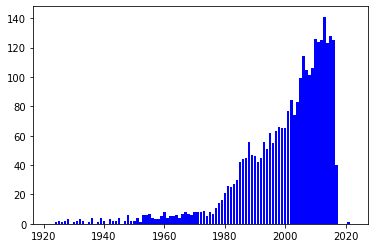

In [92]:
plt.bar(mov_year.keys(),mov_year.values([0]), color = 'b')

(0.0, 500000000.0)

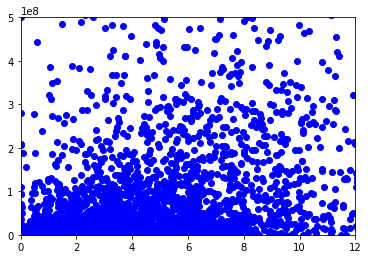

In [111]:
plt.scatter(mov_train.actor_score,mov_train.infl_revenue, color = 'b')
plt.xlim([0,12])
plt.ylim([0,0.5e9])

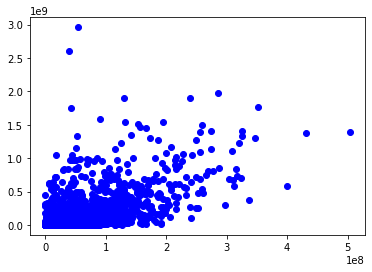

In [109]:
plt.scatter(mov_train.mod_budget,mov_train.infl_revenue, color = 'b')

<BarContainer object of 101 artists>

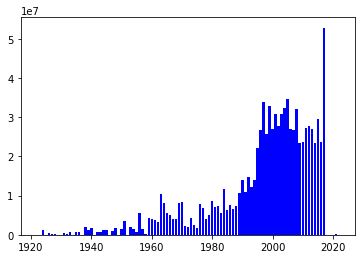

In [139]:
plt.bar(mov_year.year,mov_year.avg_budget, color = 'b')

<BarContainer object of 101 artists>

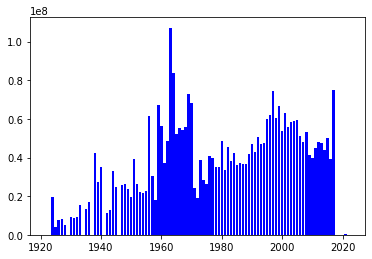

In [140]:
plt.bar(mov_year.year,mov_year.avg_mod_budget, color = 'b')

In [141]:
mov_month = pd.DataFrame(columns = ['month','number_movies','tot_budget','avg_budget','tot_revenue','avg_revenue','tot_mod_budget','avg_mod_budget','tot_infl_revenue','avg_infl_revenue'])

In [142]:
for j in range(1,13):
    mov_month.loc[j-1] = [j,0,0,0,0,0,0,0,0,0]
for j in mov_train.index:
    m = mov_train.loc[j,'month']
    mov_month.loc[m-1,'number_movies'] = mov_month.loc[m-1,'number_movies'] + 1
    mov_month.loc[m-1,'tot_revenue'] = mov_month.loc[m-1,'tot_revenue'] + mov_train.loc[j,'revenue']
    mov_month.loc[m-1,'tot_budget'] = mov_month.loc[m-1,'tot_budget'] + mov_train.loc[j,'budget']
    mov_month.loc[m-1,'tot_infl_revenue'] = mov_month.loc[m-1,'tot_infl_revenue'] + mov_train.loc[j,'infl_revenue']
    mov_month.loc[m-1,'tot_mod_budget'] = mov_month.loc[m-1,'tot_mod_budget'] + mov_train.loc[j,'mod_budget']

In [145]:
for j in mov_month.index:
    if mov_month.loc[j,'number_movies'] != 0:
        mov_month.loc[j,'avg_revenue'] = mov_month.loc[j,'tot_revenue']/mov_month.loc[j,'number_movies']
        mov_month.loc[j,'avg_budget'] = mov_month.loc[j,'tot_budget']/mov_month.loc[j,'number_movies']
        mov_month.loc[j,'avg_infl_revenue'] = mov_month.loc[j,'tot_infl_revenue']/mov_month.loc[j,'number_movies']
        mov_month.loc[j,'avg_mod_budget'] = mov_month.loc[j,'tot_mod_budget']/mov_month.loc[j,'number_movies']

In [146]:
mov_month

,month,number_movies,tot_budget,avg_budget,tot_revenue,avg_revenue,tot_mod_budget,avg_mod_budget,tot_infl_revenue,avg_infl_revenue
0,1,212,3061676944,1.44419e+07,6509838292,3.07068e+07,7.87727e+09,3.71569e+07,1.02742e+10,4.84634e+07
1,2,226,4166918462,1.84377e+07,13060290151,5.77889e+07,9.58787e+09,4.24242e+07,2.21277e+10,9.79101e+07
2,3,238,5666477416,2.38087e+07,17193465703,7.22415e+07,1.19327e+10,5.01375e+07,2.88752e+10,1.21325e+08
3,4,245,4611403894,1.88221e+07,14286969400,5.83142e+07,1.04585e+10,4.26879e+07,2.30128e+10,9.39298e+07
4,5,224,6400750443,2.85748e+07,20269249302,9.04877e+07,1.28808e+10,5.75036e+07,3.55522e+10,1.58715e+08
5,6,237,9053119023,3.81988e+07,30309074015,1.27886e+08,1.72048e+10,7.2594e+07,5.61275e+10,2.36825e+08
6,7,209,5829640276,2.7893e+07,19654403510,9.40402e+07,1.18689e+10,5.6789e+07,3.36306e+10,1.60912e+08
7,8,256,4508418476,1.7611e+07,10626740378,4.15107e+07,1.08949e+10,4.25581e+07,2.00482e+10,7.83131e+07
8,9,362,4884746560,1.34938e+07,12968389077,3.58243e+07,1.19955e+10,3.31366e+07,2.16642e+10,5.9846e+07
9,10,307,5673163742,1.84794e+07,12907091424,4.20426e+07,1.3438e+10,4.37721e+07,2.53823e+10,8.26785e+07


<BarContainer object of 12 artists>

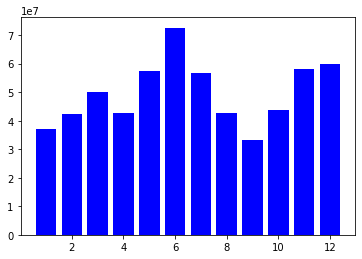

In [147]:
plt.bar(mov_month.month,mov_month.avg_mod_budget, color = 'b')

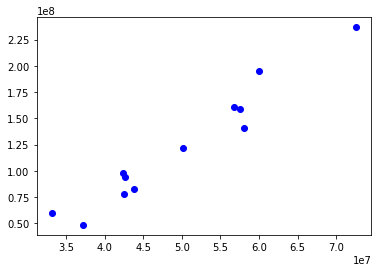

In [151]:
plt.scatter(mov_month.avg_mod_budget,mov_month.avg_infl_revenue, color = 'b')

In [152]:
mov_genre = pd.DataFrame(columns = ['genres','number_movies','tot_budget','avg_budget','tot_revenue','avg_revenue','tot_mod_budget','avg_mod_budget','tot_infl_revenue','avg_infl_revenue'])

In [153]:
print(genres)

{'Action', 'Horror', 'Adventure', 'Family', 'Crime', 'History', 'Thriller', 'Drama', 'Foreign', 'Western', 'Documentary', 'Romance', 'Comedy', 'Animation', 'War', 'Fantasy', 'Mystery', 'Music'}


In [155]:
count = 0
genre_index = {}
for j in genres:
    mov_genre.loc[count] = [j,0,0,0,0,0,0,0,0,0]
    genre_index[j]=count
    count = count + 1
for j in mov_train.index:
    for genre in genres:
        if mov_train.loc[j,genre] == 1:
            mov_genre.loc[genre_index[genre],'number_movies'] = mov_genre.loc[genre_index[genre],'number_movies'] + 1
            mov_genre.loc[genre_index[genre],'tot_revenue'] = mov_genre.loc[genre_index[genre],'tot_revenue'] + mov_train.loc[j,'revenue']
            mov_genre.loc[genre_index[genre],'tot_budget'] = mov_genre.loc[genre_index[genre],'tot_budget'] + mov_train.loc[j,'budget']
            mov_genre.loc[genre_index[genre],'tot_infl_revenue'] = mov_genre.loc[genre_index[genre],'tot_infl_revenue'] + mov_train.loc[j,'infl_revenue']
            mov_genre.loc[genre_index[genre],'tot_mod_budget'] = mov_genre.loc[genre_index[genre],'tot_mod_budget'] + mov_train.loc[j,'mod_budget']

In [158]:
mov_genre

,genres,number_movies,tot_budget,avg_budget,tot_revenue,avg_revenue,tot_mod_budget,avg_mod_budget,tot_infl_revenue,avg_infl_revenue
0,Action,741,29934126656,4.03969e+07,82283193867,1.11043e+08,5.48487e+10,7.40199e+07,1.38294e+11,1.86632e+08
1,Horror,301,4578070363,1.52095e+07,15865430318,5.27091e+07,1.04321e+10,3.46582e+07,3.1973e+10,1.06223e+08
2,Adventure,439,23738161039,5.40733e+07,77180369998,1.75809e+08,4.12467e+10,9.39561e+07,1.29731e+11,2.95514e+08
3,Family,260,11048890059,4.24957e+07,36113426664,1.38898e+08,2.08419e+10,8.01611e+07,5.91048e+10,2.27326e+08
4,Crime,469,11128971302,2.37291e+07,27901408828,5.94913e+07,2.22657e+10,4.74748e+07,4.98802e+10,1.06354e+08
5,History,132,2997539637,2.27086e+07,5070546615,3.84132e+07,7.63507e+09,5.78415e+07,1.45518e+10,1.10241e+08
6,Thriller,789,20873192826,2.64553e+07,53917610066,6.83366e+07,4.10459e+10,5.20227e+07,9.96459e+10,1.26294e+08
7,Drama,1531,25733940425,1.68086e+07,69516699191,4.54061e+07,6.34153e+10,4.14208e+07,1.37548e+11,8.98417e+07
8,Foreign,31,40334367,1.30111e+06,58100126,1.8742e+06,7.58293e+08,2.44611e+07,1.01195e+08,3.26437e+06
9,Western,43,819744461,1.90638e+07,2208937320,5.13706e+07,2.12025e+09,4.9308e+07,5.74833e+09,1.33682e+08


In [157]:
for j in mov_genre.index:
    if mov_genre.loc[j,'number_movies'] != 0:
        mov_genre.loc[j,'avg_revenue'] = mov_genre.loc[j,'tot_revenue']/mov_genre.loc[j,'number_movies']
        mov_genre.loc[j,'avg_budget'] = mov_genre.loc[j,'tot_budget']/mov_genre.loc[j,'number_movies']
        mov_genre.loc[j,'avg_infl_revenue'] = mov_genre.loc[j,'tot_infl_revenue']/mov_genre.loc[j,'number_movies']
        mov_genre.loc[j,'avg_mod_budget'] = mov_genre.loc[j,'tot_mod_budget']/mov_genre.loc[j,'number_movies']

<BarContainer object of 18 artists>

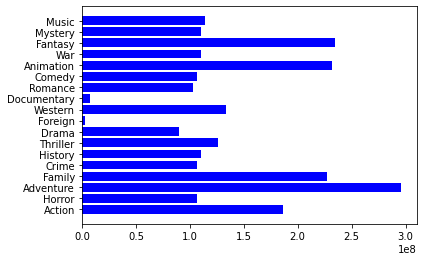

In [163]:
plt.barh(mov_genre.genres,mov_genre.avg_infl_revenue, color = 'b')